In [11]:
#install gensim library for topic modeling algorithm 
!python -m pip install -U gensim 

Requirement already up-to-date: gensim in /opt/anaconda3/lib/python3.8/site-packages (3.8.3)


In [12]:
import os.path #to work in iOS
from gensim import corpora # gensim model to create a corpus dict
from gensim.models import LsiModel # gensim Latent Sentiment Indexing model - generates topics
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords # remove stopwords to process data into corpus
from nltk.stem.porter import PorterStemmer #for stemming and lemmatization 
from gensim.models.coherencemodel import CoherenceModel# to calculate coherence values to determine optimal topic numbers
import matplotlib.pyplot as plt 

In [13]:
# Create data load function for loading covid_cleandf2.csv. 
# """
#     Input  : path and file_name
#     Purpose: loading text file
#     Output : list of paragraphs/documents and
#              title(initial 100 words considred as title of document)
# with open( os.path.join(path, file_name) ,"r", encoding='utf_8') as fin:


#     """

def load_data(path, file_name):
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [14]:
documents_list,titles = load_data('/Users/tamaralottering/Downloads/GitHub/ds4d-project/Clean Data','DE_cleandf.txt')

Total Number of Documents: 252


In [15]:
# After data loading function, you need to preprocess the text. 
# Following steps are taken to preprocess the text:

# Tokenize the text articles
# Remove stop words
# Perform stemming on text artcle

def preprocess_data(documents_list):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in documents_list:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [16]:
doc_clean = preprocess_data(documents_list)

In [17]:
# Prepare Corpus
# Next step is to prepare corpus. Here, you need to create a document-term matrix and dictionary of terms.

def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [18]:
 dictionary,doc_term_matrix = prepare_corpus(doc_clean)

In [35]:
# Create an LSA model using Gensim
# After corpus creation, you can generate a model using LSA.

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix = prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [36]:
# Determine the number of topics
# Another extra step needs to be taken to optimize results by identifying an optimum amount of topics. Here, you will generate coherence scores to determine an optimum number of topics.

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop = number_of_topics, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for number_of_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [37]:
#Let's plot coherence score values to have a sense of optimal no. of topics
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

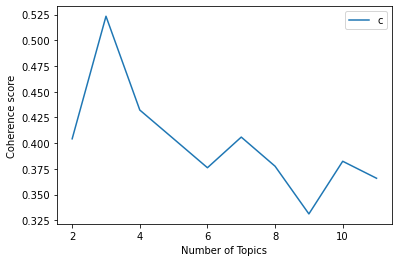

In [38]:
start,stop,step=2,12,1
plot_graph(doc_clean,start,stop,step)

In [40]:
# LSA Model
number_of_topics=4
words=10
document_list,titles=load_data('/Users/tamaralottering/Downloads/GitHub/ds4d-project/Clean Data','DE_cleandf.txt')
text=preprocess_data(documents_list)
model=create_gensim_lsa_model(doc_clean,number_of_topics,words)

Total Number of Documents: 252
[(0, '0.317*"coronaviru" + 0.314*"said" + 0.234*"countri" + 0.188*"case" + 0.188*"peopl" + 0.179*"death" + 0.153*"new" + 0.138*"report" + 0.134*"covid19" + 0.133*"health"'), (1, '0.308*"tourism" + 0.238*"consequ" + 0.237*"lilicoronaviru" + -0.222*"death" + -0.181*"case" + 0.181*"close" + 0.178*"border" + -0.169*"new" + 0.153*"travel" + 0.132*"germani"'), (2, '0.253*"club" + 0.246*"leagu" + 0.216*"bundesliga" + 0.191*"season" + -0.188*"tourism" + 0.186*"test" + 0.181*"may" + -0.178*"lilicoronaviru" + 0.175*"footbal" + 0.147*"sport"')]


#### Topics: 
- Topic 1:"coronaviru", "said", "countri", "case", "peopl", "death", "new", "report", covid19", "health" (New report on cases of people killed by COVID-19)
- Topic 2: "tourism", consequ", lilicoronaviru, death", "case", "close", "border", "new", "travel", "germani"(Closed borders due to covid has effects on tourism)
- Topic 3: "club", "leagu", "bundesliga, "season", "tourism", "test", "may", "lilicoronaviru", "footbal", "sport"(bundesliga football league and covid-19 tests)
- Topic 4: "rescu", "ocean", "vike", "peopl" , "sea", "quarantin, "refuge", "migrant", "visual" (rescue refugees at sea??)